## 1. Library and Input File

In [47]:
# Import dependencies
from sklearn.metrics import confusion_matrix
import numpy as np # Linear algebra
import pandas as pd # Data processing, CSV file
import matplotlib.pyplot as plt # data graph drawing
import seaborn as sns

## 2. Load and Check Data

In [36]:
data = pd.read_csv('/content/sample_data/Cancer_Data.csv')
data.info() # general information of data
print(data['Unnamed: 32']) # a column that is completely null
print(data['id']) # an uncessary value for the algorithm
data.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


## 3. Data manipulation


In [37]:
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
# 'axis=1' indicates to delete the whole colume
# 'inplace=True' means replace master data; does not create a copy
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

## 4. Data Graph
* We will analyze the distribution of benign (B) and malignant (M) cancers in the data on the graph with two unique featuers

1. 'M' = Malignant Cancer
2. 'B' = Benign Cancer


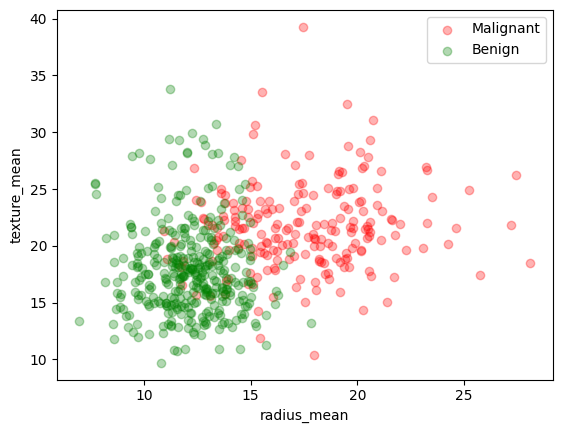

In [38]:
M = data[data.diagnosis == 'M'] # Diagnosis transfers all values of M
# to M data
B = data[data.diagnosis == 'B'] # Diagnosis transfers all values of B
# to B data

plt.scatter(M.radius_mean,M.texture_mean, color='red', label='Malignant',
            alpha=0.3)
plt.scatter(B.radius_mean,B.texture_mean, color='green', label='Benign',
            alpha=0.3)

plt.xlabel('radius_mean')
plt.ylabel('texture_mean')

plt.legend()
plt.show()

## 5. Diagnosis change 0 or 1
* In order for the data to enter the classification algorithm and recieve processing, it must not be object structured, so we convert this data into 1 and 0.

1. 1 = M (Malignant Cancer Cell)
2. 0 = B (Benign Cancer Cell)

In [39]:
data.diagnosis = [1 if each == 'M' else 0
                  for each in data.diagnosis] # changes M -> 1 & B -> 0
y = data.diagnosis # puts 1 (Malignant) & 0 (Benign) labels into y
x_data = data.drop(['diagnosis'],axis=1) # drops the labels -> only data
print('X Data \n', x_data)
print('Y Data \n', y)

X Data 
      radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_

## Data Normalization
* We reduce all data to values between 0 and 1 so that operations can be performed and so that very large or very small values in the data cannot manipulate the data

In [40]:
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))
# Min-Max Normalization -> all feature values
# fall within a specified range [0, 1]

# X data info
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.004229,0.002440,0.028867,0.235308,0.000028,0.000065,0.000071,0.000035,0.000057,0.000019,...,0.005966,0.004074,0.043394,0.474612,0.000038,0.000156,0.000167,0.000062,0.000108,0.000028
1,0.004835,0.004177,0.031241,0.311707,0.000020,0.000018,0.000020,0.000016,0.000043,0.000013,...,0.005874,0.005503,0.037330,0.459803,0.000029,0.000044,0.000057,0.000044,0.000065,0.000021
2,0.004629,0.004995,0.030559,0.282793,0.000026,0.000038,0.000046,0.000030,0.000049,0.000014,...,0.005541,0.006001,0.035849,0.401740,0.000034,0.000100,0.000106,0.000057,0.000085,0.000021
3,0.002685,0.004791,0.018237,0.090762,0.000033,0.000067,0.000057,0.000025,0.000061,0.000023,...,0.003505,0.006229,0.023242,0.133451,0.000049,0.000204,0.000161,0.000061,0.000156,0.000041
4,0.004770,0.003371,0.031758,0.304890,0.000024,0.000031,0.000047,0.000025,0.000043,0.000014,...,0.005299,0.003919,0.035778,0.370240,0.000032,0.000048,0.000094,0.000038,0.000056,0.000018


## 7. Train and Test Split
* Main data was divided into 70% training data and 30% test data


In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,
                                                    random_state=1)

In [42]:
# X_train data info
print('X_train')
x_train

X_train


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
249,0.002708,0.003510,0.017365,0.095510,0.000024,0.000018,1.017395e-05,6.885284e-06,0.000044,0.000014,...,0.002974,0.004981,0.019013,0.115609,0.000033,0.000037,4.240715e-05,0.000023,0.000063,0.000018
58,0.003068,0.004539,0.019419,0.123930,0.000019,0.000009,1.626704e-07,9.795487e-07,0.000043,0.000013,...,0.003345,0.005230,0.021213,0.146709,0.000024,0.000015,4.337094e-07,0.000003,0.000057,0.000015
476,0.003338,0.004826,0.021723,0.145369,0.000021,0.000026,1.190174e-05,7.188528e-06,0.000035,0.000014,...,0.003867,0.006408,0.026352,0.194758,0.000027,0.000081,5.905031e-05,0.000031,0.000060,0.000018
529,0.002837,0.003159,0.018296,0.104654,0.000026,0.000021,8.888105e-06,6.577339e-06,0.000039,0.000016,...,0.003162,0.003707,0.020433,0.129267,0.000036,0.000038,3.812882e-05,0.000017,0.000065,0.000019
422,0.002729,0.003766,0.017739,0.095957,0.000026,0.000027,1.668312e-05,1.057123e-05,0.000044,0.000015,...,0.002971,0.004624,0.019260,0.111824,0.000033,0.000051,5.411378e-05,0.000026,0.000066,0.000017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.004652,0.005905,0.030654,0.280207,0.000024,0.000037,5.982605e-05,2.700987e-05,0.000052,0.000014,...,0.005320,0.007894,0.034955,0.373531,0.000030,0.000091,1.333568e-04,0.000041,0.000078,0.000020
144,0.002527,0.003519,0.016046,0.083521,0.000018,0.000012,5.291490e-06,1.851199e-06,0.000033,0.000013,...,0.002809,0.004871,0.018286,0.103714,0.000025,0.000029,2.293136e-05,0.000008,0.000054,0.000016
72,0.004043,0.005764,0.026845,0.218477,0.000025,0.000043,3.977433e-05,1.867419e-05,0.000045,0.000015,...,0.005482,0.007950,0.035637,0.395157,0.000037,0.000174,1.543488e-04,0.000045,0.000078,0.000031
235,0.003298,0.004995,0.021107,0.141843,0.000021,0.000016,3.436765e-06,4.456982e-06,0.000036,0.000014,...,0.003604,0.007118,0.023101,0.168195,0.000030,0.000036,1.464739e-05,0.000019,0.000052,0.000018


In [21]:
# dimensions of X_train
x_train.shape # (398 rows, 30 cols)

(398, 30)

In [22]:
# y_train data info
print('Y_train')
y_train

Y_train


,diagnosis
249,0
58,0
476,0
529,0
422,0
...,...
129,1
144,0
72,1
235,0


In [23]:
# dimensions of y_train
y_train.shape # (398 rows, 1 col)

(398,)

In [24]:
print('X test')
x_test

X test


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
421,0.003453,0.003286,0.023089,0.154231,0.000024,0.000043,0.000034,0.000015,0.000049,0.000017,...,0.003869,0.004311,0.026822,0.190221,0.000031,0.000085,0.000076,0.000026,0.000066,0.000022
47,0.003096,0.004386,0.020212,0.125670,0.000027,0.000029,0.000029,0.000017,0.000050,0.000016,...,0.003684,0.006570,0.024165,0.178514,0.000042,0.000098,0.000118,0.000049,0.000092,0.000028
292,0.003044,0.003766,0.019544,0.120757,0.000024,0.000019,0.000014,0.000008,0.000041,0.000015,...,0.003230,0.004685,0.020877,0.137612,0.000035,0.000049,0.000053,0.000025,0.000079,0.000023
186,0.004304,0.004368,0.027880,0.244711,0.000020,0.000020,0.000019,0.000014,0.000038,0.000013,...,0.005009,0.006197,0.032722,0.331453,0.000029,0.000057,0.000083,0.000037,0.000075,0.000016
414,0.003557,0.007008,0.022734,0.169135,0.000020,0.000011,0.000011,0.000006,0.000044,0.000012,...,0.004057,0.008677,0.025882,0.218947,0.000027,0.000023,0.000036,0.000015,0.000076,0.000014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,0.004290,0.004697,0.028115,0.244476,0.000022,0.000026,0.000026,0.000017,0.000042,0.000013,...,0.005378,0.006502,0.036013,0.377527,0.000034,0.000061,0.000089,0.000045,0.000072,0.000020
487,0.004570,0.004424,0.030113,0.274330,0.000026,0.000034,0.000053,0.000028,0.000043,0.000014,...,0.005632,0.007144,0.036178,0.409027,0.000036,0.000088,0.000140,0.000048,0.000077,0.000021
11,0.003709,0.004205,0.024354,0.183592,0.000023,0.000030,0.000023,0.000016,0.000043,0.000014,...,0.004800,0.006413,0.032087,0.305360,0.000033,0.000132,0.000093,0.000043,0.000089,0.000025
268,0.003025,0.003811,0.019365,0.120404,0.000022,0.000015,0.000009,0.000004,0.000047,0.000014,...,0.003268,0.005557,0.020985,0.140456,0.000030,0.000043,0.000047,0.000014,0.000085,0.000017


In [25]:
# Check dimensions of x_test
x_test.shape # (171 rows, 30 cols)

(171, 30)

In [26]:
print('Y test')
y_test

Y test


,diagnosis
421,0
47,1
292,0
186,1
414,1
...,...
6,1
487,1
11,1
268,0


In [27]:
# Check dimensiosn of y_test
y_test.shape # (171 rows, 1 col)

(171,)

## 8. Find K values
* draw a graph to find perfect K values. The value we choose is 3

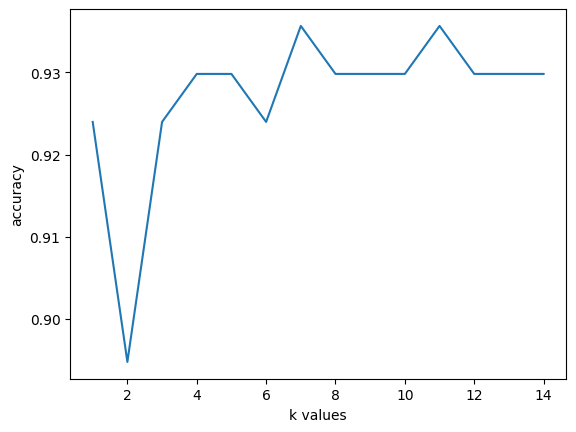

In [43]:
from sklearn.neighbors import KNeighborsClassifier
Score_list = []

for each in range(1, 15):
  knn2 = KNeighborsClassifier(n_neighbors = each)
  knn2.fit(x_train,y_train)
  Score_list.append(knn2.score(x_test,y_test))

plt.plot(range(1,15),Score_list)
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.show()

## 9. K-NN Model
* Here we examine the accuracy score of the K-nn Model and we get a score of 0.9532 which indicates that we have trained a good model in general, of course, better results can be obtained by playing with the values.

Accuracy Score
----------------------------
3 nn Acc Score 0.9239766081871345
------------------------------




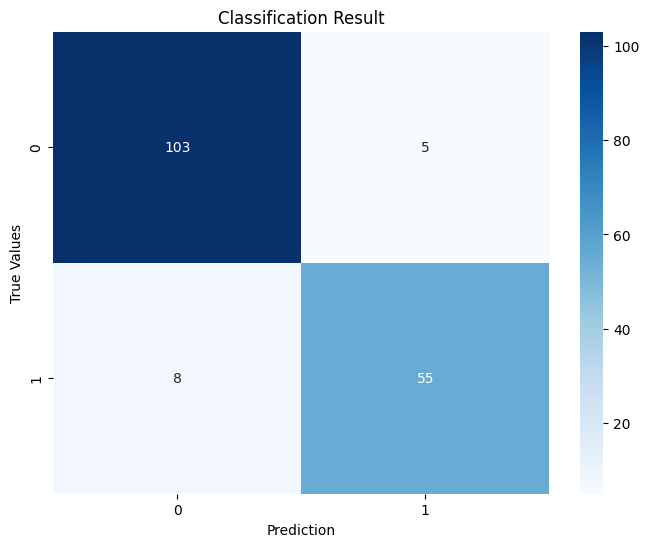



Result Eval
------------------------
Sum True Prediction: 158

Sum False Prediction: 13



In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('Accuracy Score')
print('----------------------------')
print('{} nn Acc Score {}'.format(3,knn.score(x_test,y_test)))
print('------------------------------\n\n')
# seaborn table
cm = confusion_matrix(y_test, prediction.reshape(-1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Prediction')
plt.ylabel('True Values')
plt.title('Classification Result')
correct_predictions = np.trace(cm)
total_predictions = np.sum(cm)
incorrect_predictions = total_predictions - correct_predictions
plt.show()
# Result
print('\n')
print('Result Eval')
print('------------------------')
print(f'Sum True Prediction: {correct_predictions}\n')
print(f'Sum False Prediction: {incorrect_predictions}\n')